# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
# Lets prepare the dataframe
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
dataset['price']=boston.target

In [12]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
#missing values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [16]:
## EDA
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


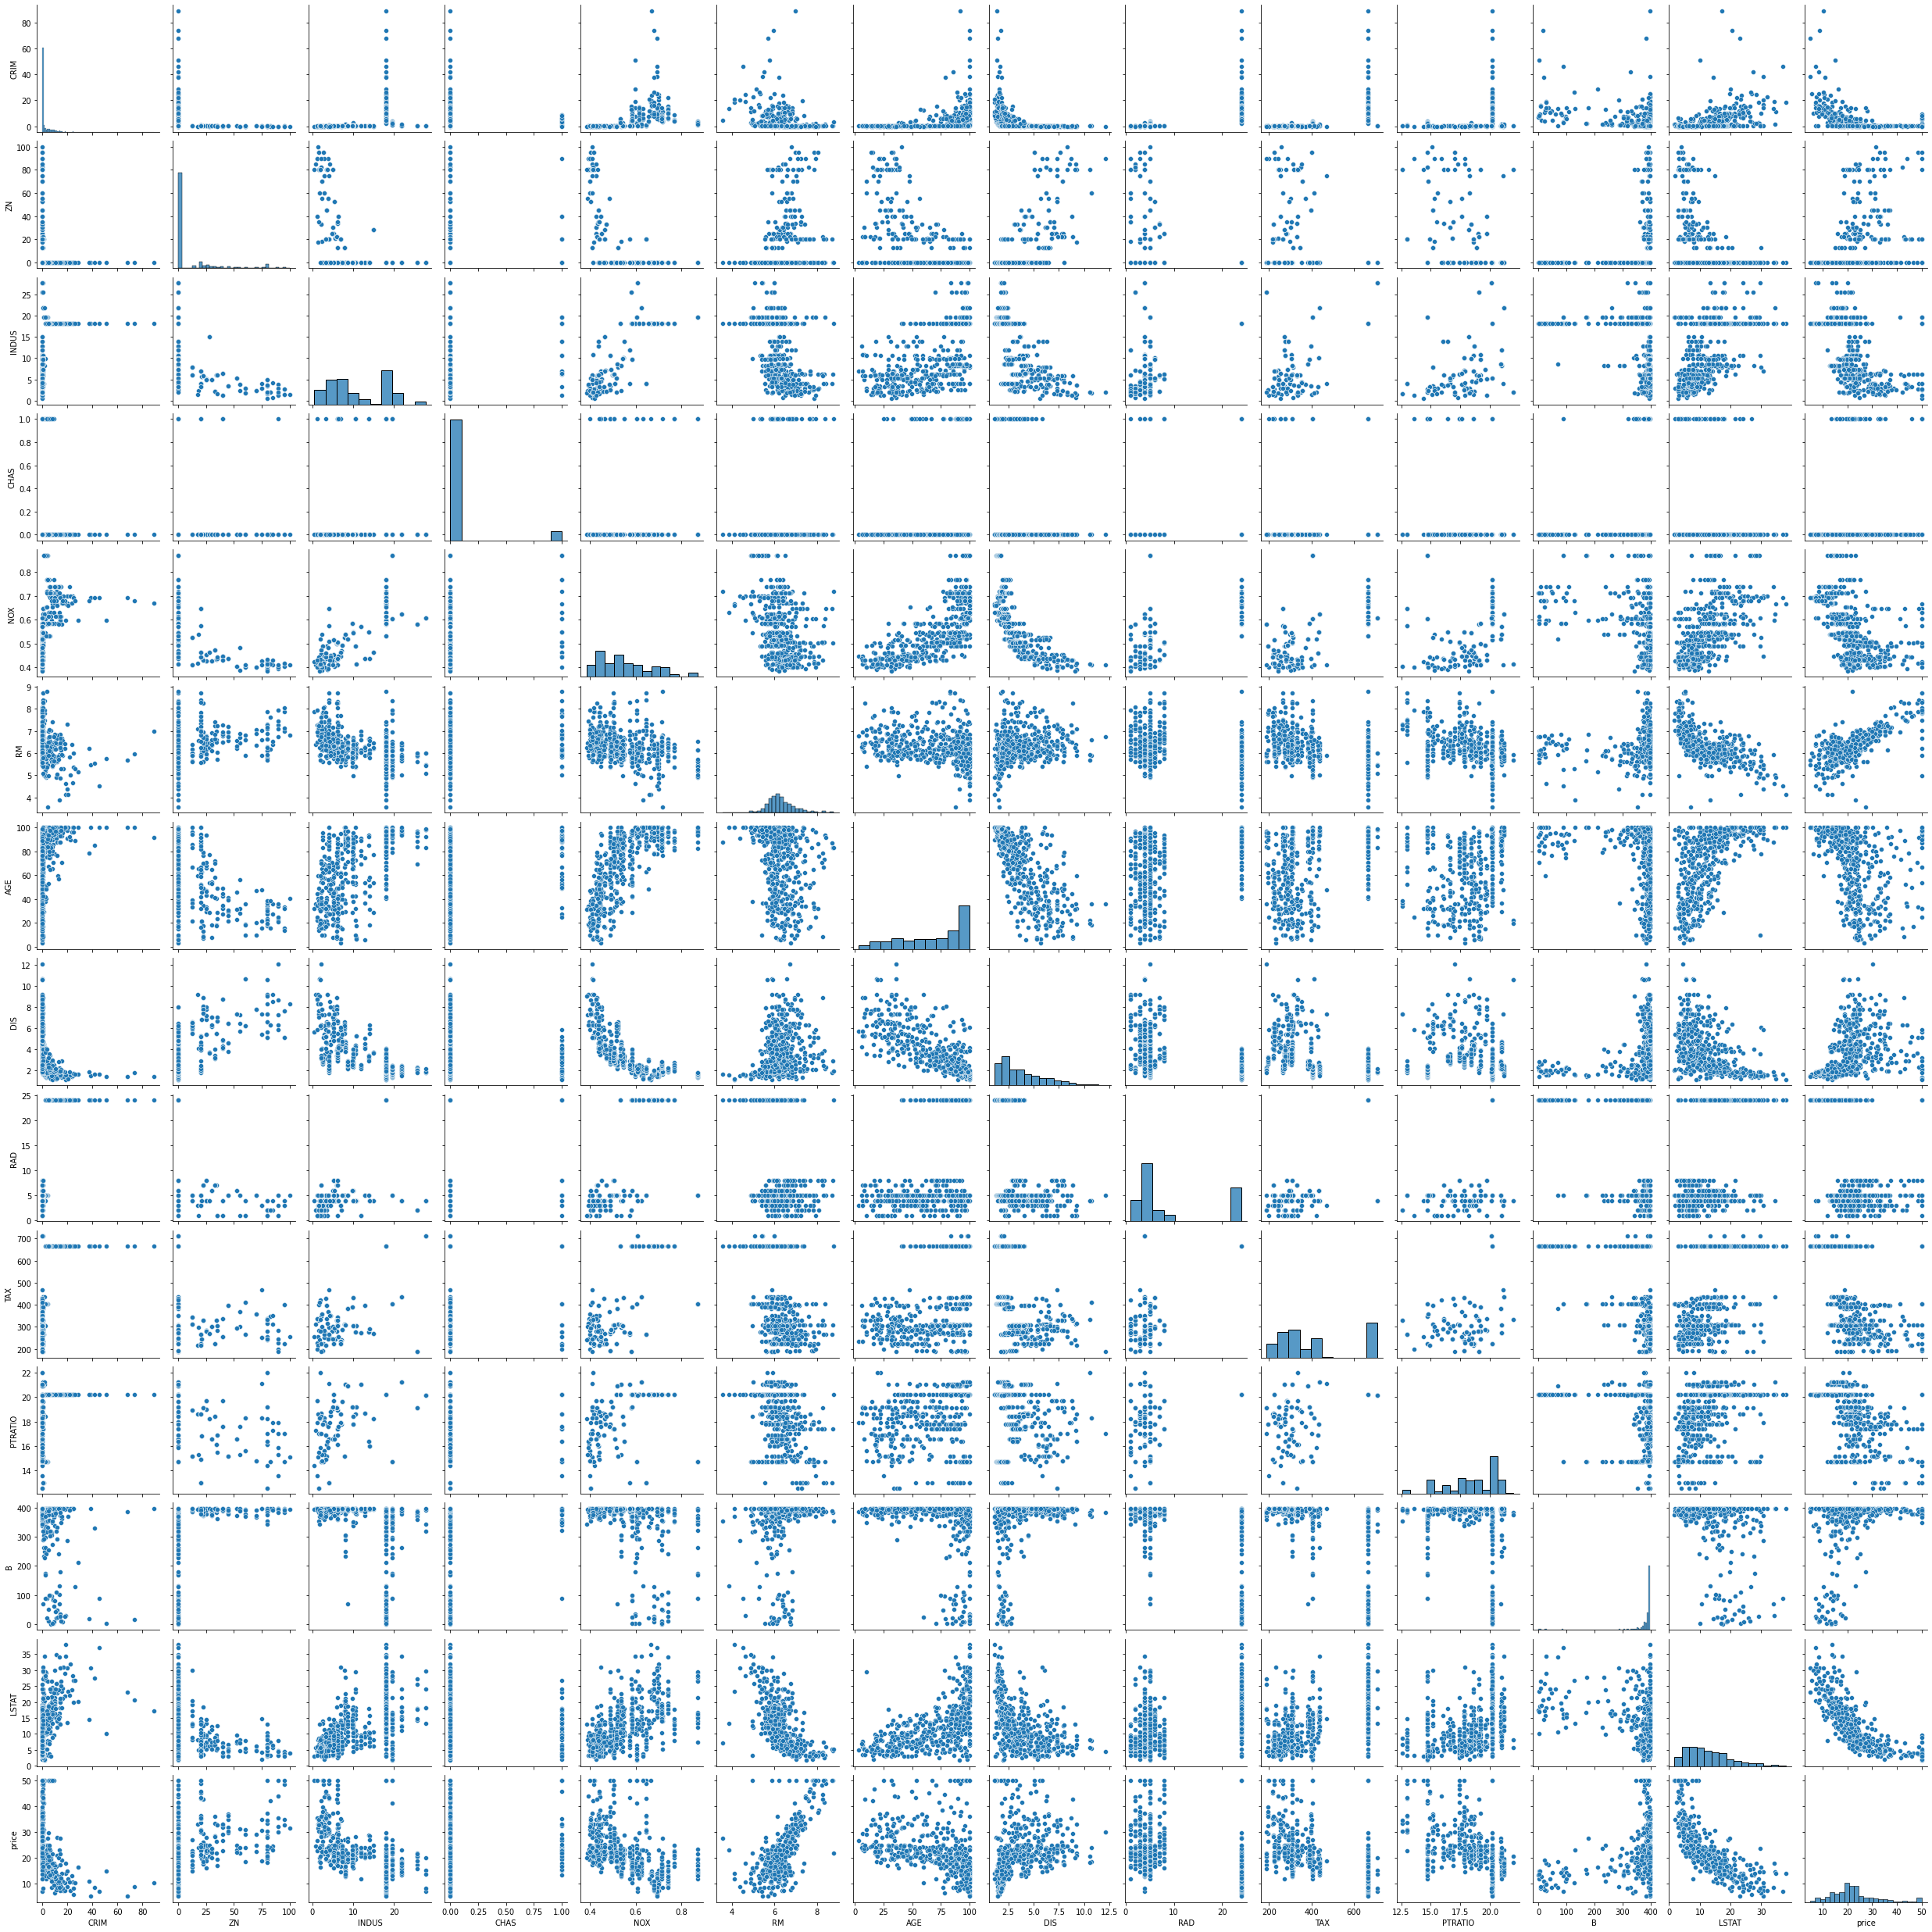

In [17]:
sns.pairplot(dataset)

<AxesSubplot: >

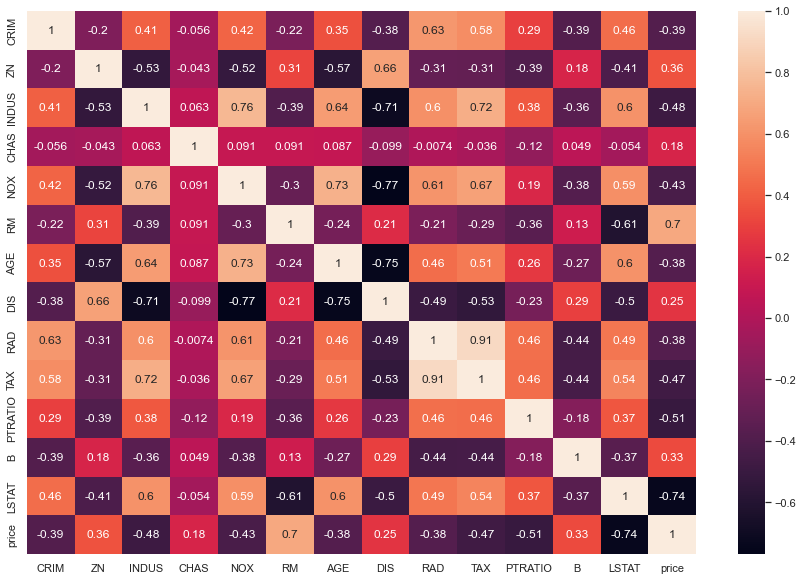

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.corr(),annot=True)

Text(0, 0.5, 'Price')

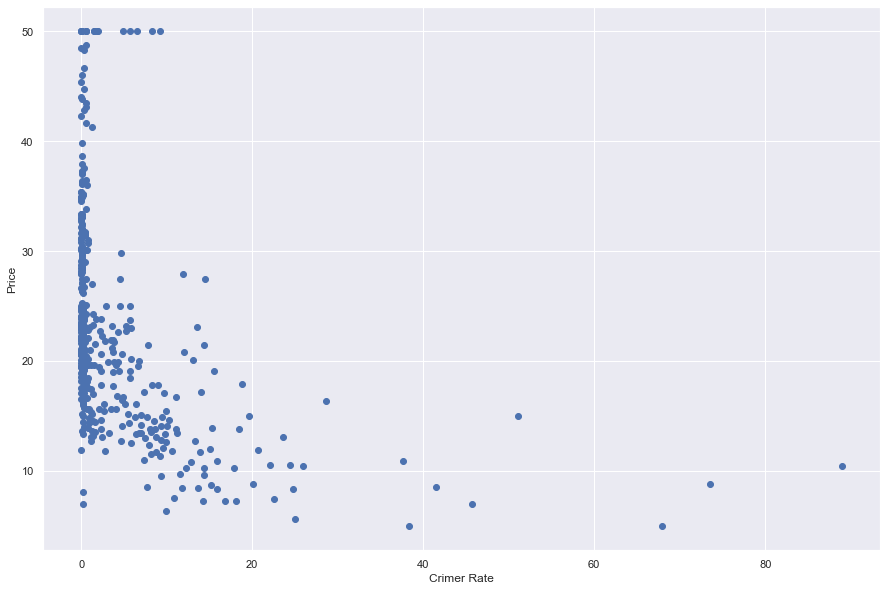

In [19]:
plt.scatter(dataset['CRIM'],dataset['price'])
plt.xlabel("Crimer Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

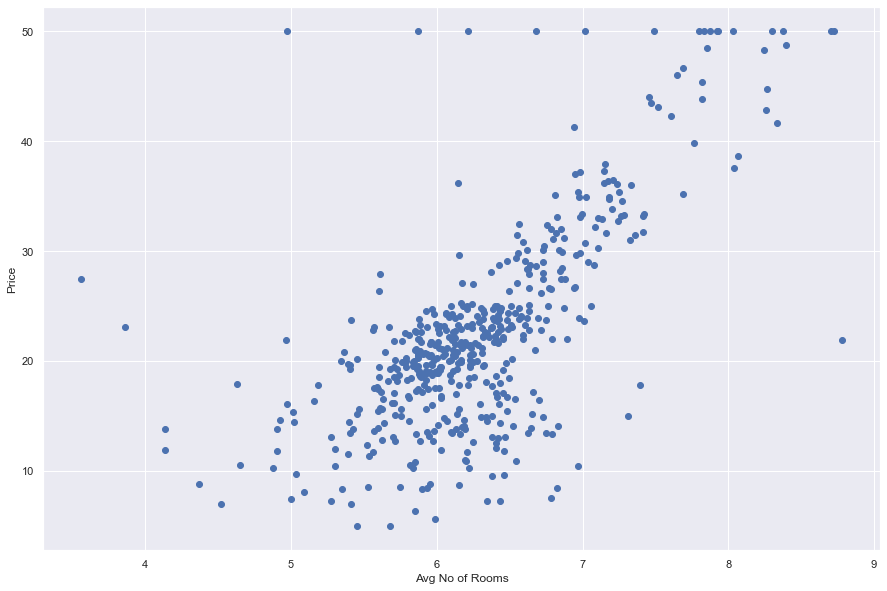

In [20]:
plt.scatter(dataset['RM'],dataset['price'])
plt.xlabel("Avg No of Rooms")
plt.ylabel("Price")

<AxesSubplot: xlabel='RM', ylabel='price'>

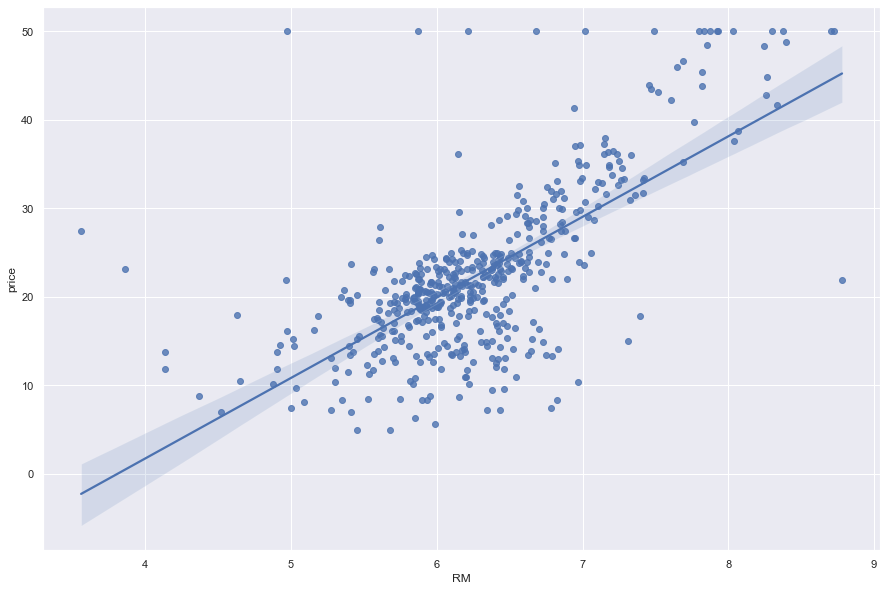

In [21]:
sns.regplot(x="RM",y="price",data=dataset)

<AxesSubplot: xlabel='LSTAT', ylabel='price'>

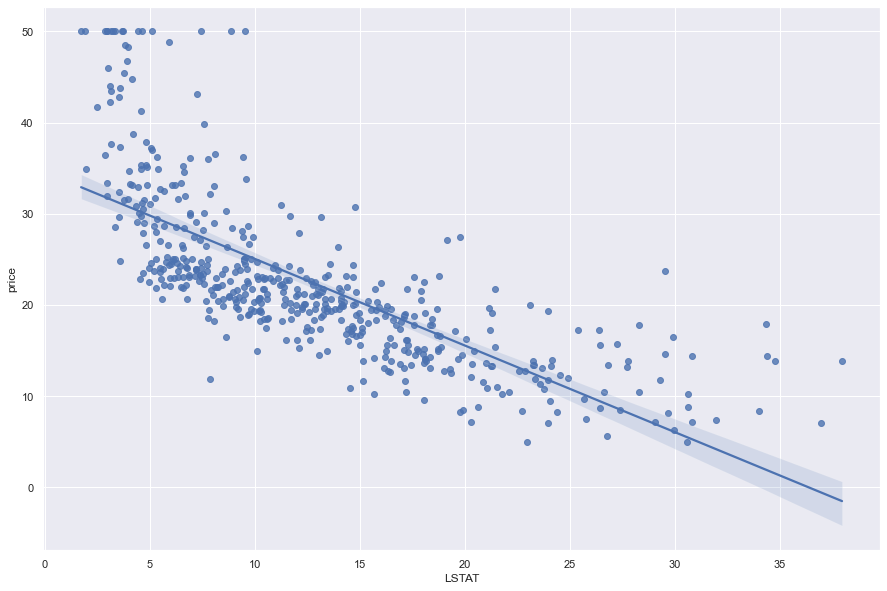

In [22]:
sns.regplot(x="LSTAT",y="price",data=dataset)

<AxesSubplot: xlabel='CRIM', ylabel='price'>

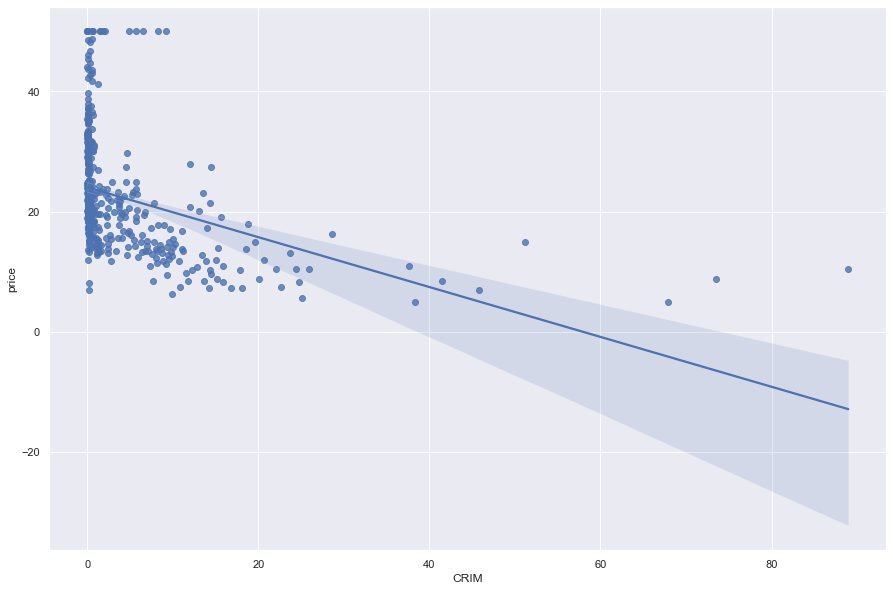

In [23]:
sns.regplot(x="CRIM",y="price",data=dataset)

C:\Users\slkpd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='price'>

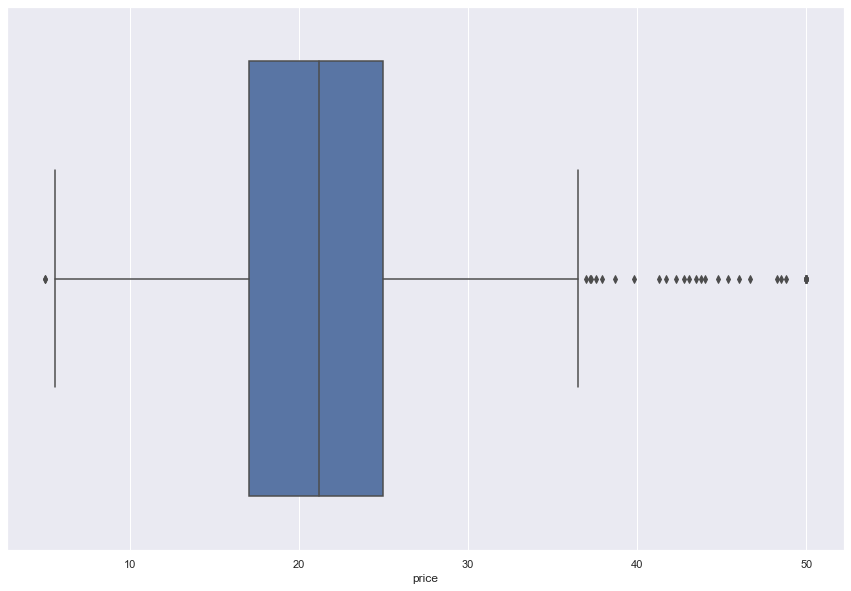

In [24]:
sns.boxplot(dataset['price'])

C:\Users\slkpd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='CRIM'>

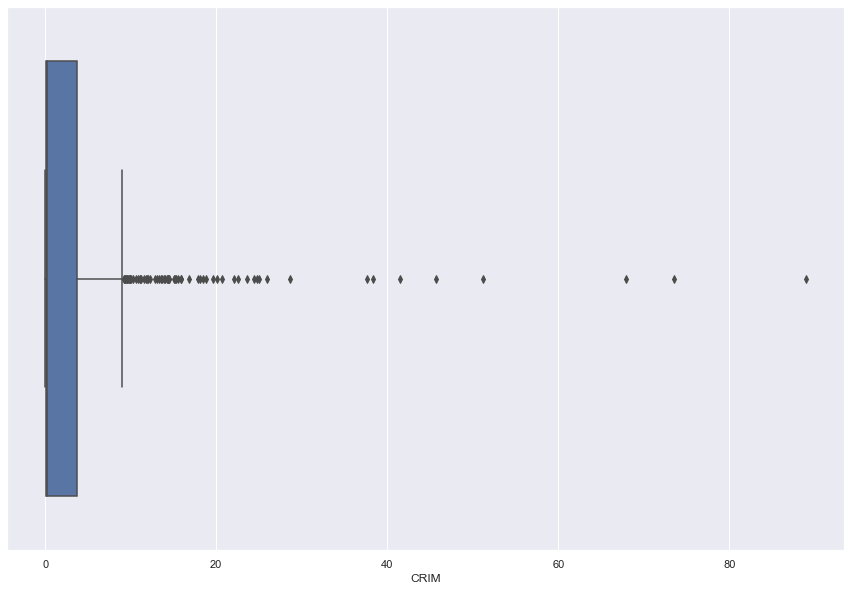

In [25]:
sns.boxplot(dataset['CRIM'])

C:\Users\slkpd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='RM'>

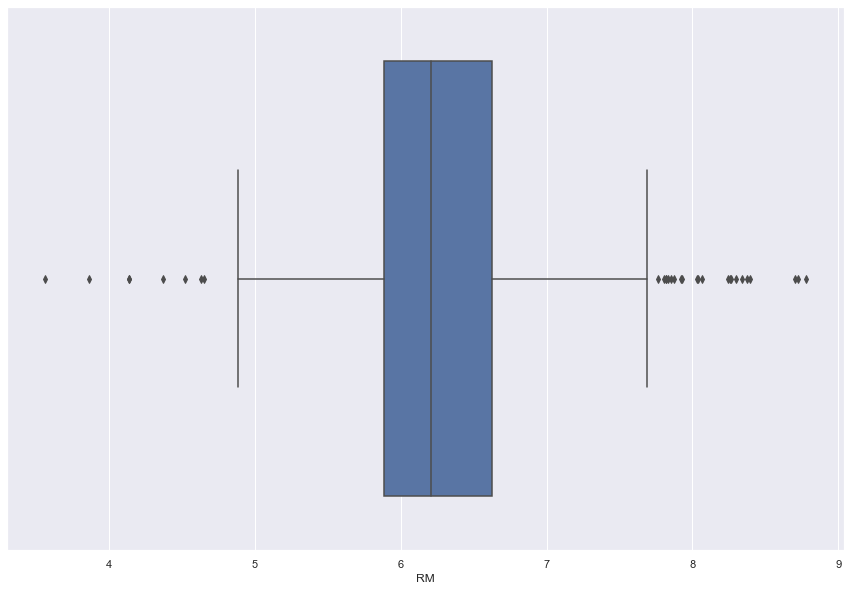

In [26]:
sns.boxplot(dataset['RM'])

In [27]:
## Independent features
X=dataset.iloc[:,:-1]

In [28]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# Dependent features
y=dataset.iloc[:,-1]

In [30]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

In [31]:
#split the train and test data
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [33]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [34]:
y_train

478    14.6
26     16.6
7      27.1
492    20.1
108    19.8
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: price, Length: 339, dtype: float64

In [35]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98


In [36]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: price, Length: 167, dtype: float64

In [37]:
X_train.shape

(339, 13)

In [38]:
y_train.shape

(339,)

In [39]:
X_test.shape

(167, 13)

In [40]:
y_test.shape

(167,)

In [41]:
# standadize or feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [42]:
scaler

StandardScaler()

In [43]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [44]:
X_test=scaler.transform(X_test)
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

## Model Training

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
regression=LinearRegression()

In [47]:
regression

LinearRegression()

In [48]:
#training the data
regression.fit(X_train, y_train)

LinearRegression()

In [49]:
## print the coefficients and the intercept
print(regression.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


In [50]:
print(regression.intercept_)

22.970796460176988


In [51]:
## prediction for the test data
reg_pred=regression.predict(X_test)

In [52]:
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

Text(0, 0.5, 'Test Predicted data')

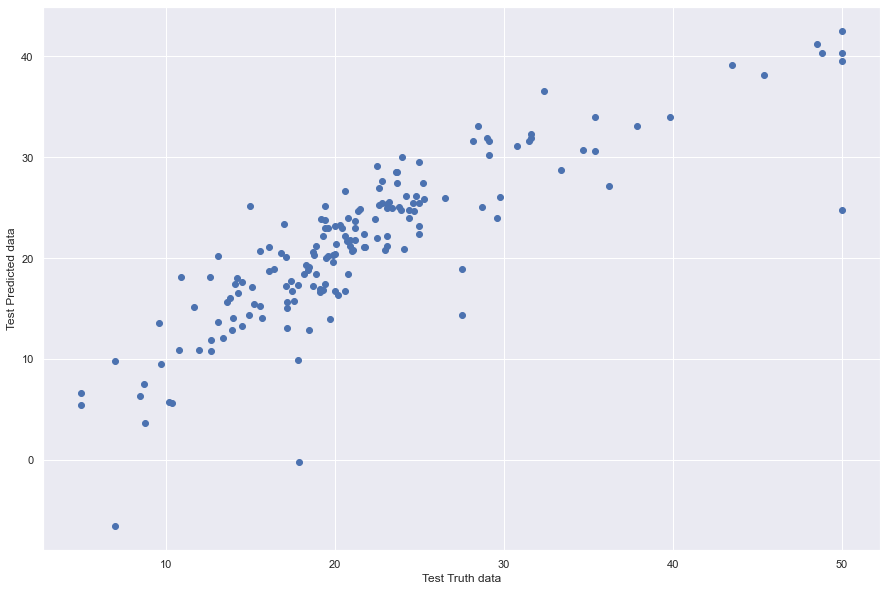

In [56]:
### Assumptions of linear regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth data")
plt.ylabel("Test Predicted data")

In [58]:
# residuals
residuals=y_test-reg_pred
residuals

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: price, Length: 167, dtype: float64

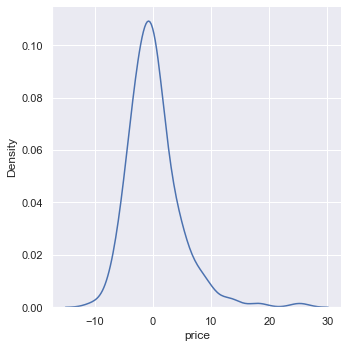

In [61]:
sns.displot(residuals,kind="kde")

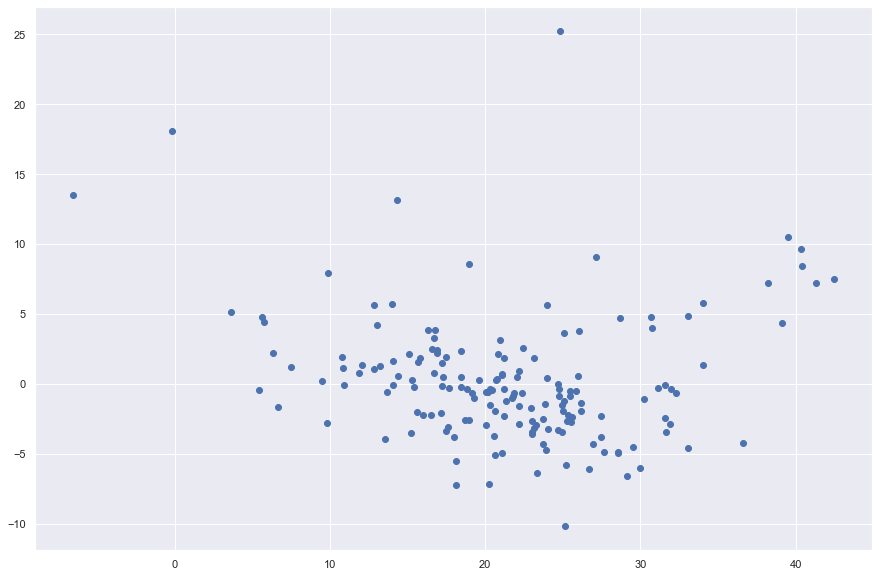

In [62]:
## Scatter plot with prediction s and residuals
#uniform distributionm: should not  have any shape like sine , parabola etc
plt.scatter(reg_pred,residuals)

In [64]:
## performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

20.724023437339753
3.148255754816832
4.552364598463062


In [65]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7261570836552476


In [66]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7028893848808568

## Ridge Regression ( L2 Regularization )

In [67]:
from sklearn.linear_model import Ridge

In [70]:
regression = Ridge(alpha=1.0)

In [71]:
regression

Ridge()

In [73]:
# Model training
regression = regression.fit(X_train,y_train)

In [74]:
# Coefficients
regression.coef_

array([-0.97541551,  0.84608896,  0.37564928,  0.86738391, -1.86077739,
        2.81535042, -0.36108635, -3.00177053,  1.95063015, -1.29462251,
       -2.06972563,  1.03867858, -3.91121554])

In [75]:
# intercept
regression.intercept_

22.970796460176988

In [76]:
# Prediction for test data
reg_pred = regression.predict(X_test)
reg_pred

array([28.50742044, 36.56623172, 15.74385228, 25.49107605, 18.70449805,
       23.16555674, 17.3353633 , 14.11553585, 22.94790581, 20.56605905,
       24.89034838, 18.45231813, -6.44592912, 21.85588536, 19.15767075,
       26.02049072, 20.20418625,  5.75334034, 40.26109346, 17.45757103,
       27.43625   , 30.15008183, 10.86542778, 23.8922577 , 17.98002216,
       15.97783016, 23.27084129, 14.39145132, 22.39046559, 19.33913789,
       22.14761798, 25.0633962 , 25.12323651, 18.44886131, 16.56498494,
       17.51980787, 30.71926279, 20.06321173, 24.0051703 , 24.93961773,
       14.01804472, 31.55716108, 42.36411402, 17.74514996, 26.92815913,
       17.13671991, 13.73088718, 26.14522758, 20.23784138, 30.01688815,
       21.23834632, 33.98097943, 15.46847103, 25.98238451, 39.0872846 ,
       22.93270116, 18.79729577, 32.98900997, 24.75121546, 12.88534635,
       22.44620063, 30.6177806 , 31.5496446 , 16.3728183 , 21.07398052,
       16.71642532, 20.21399742, 26.13275151, 31.06390949, 11.90

Text(0, 0.5, 'Test Predicted data')

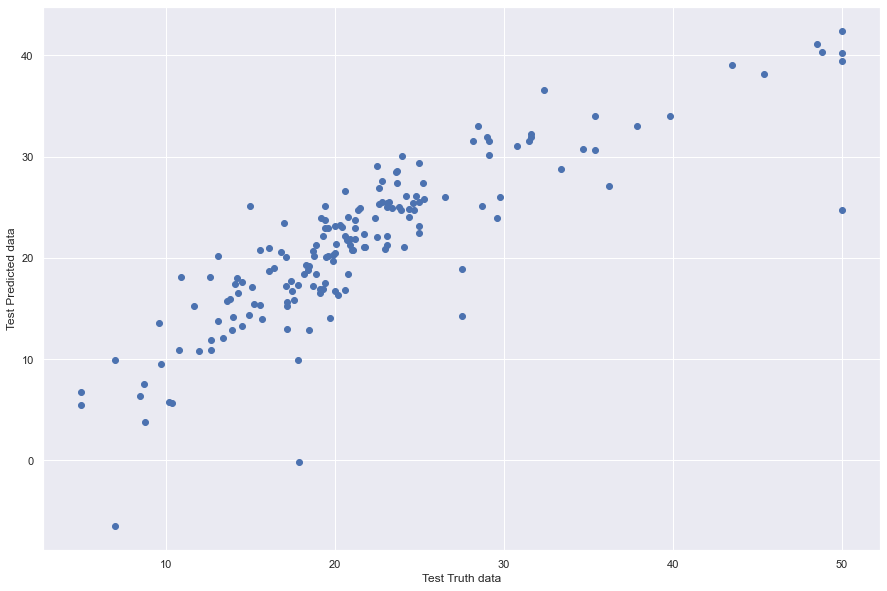

In [77]:
### Assumptions of linear regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth data")
plt.ylabel("Test Predicted data")

In [78]:
# residuals
residuals=y_test-reg_pred
residuals

173   -4.907420
274   -4.166232
491   -2.143852
72    -2.691076
452   -2.604498
         ...   
110    0.612742
321   -1.920144
265   -4.804533
29     0.250849
262    8.445592
Name: price, Length: 167, dtype: float64

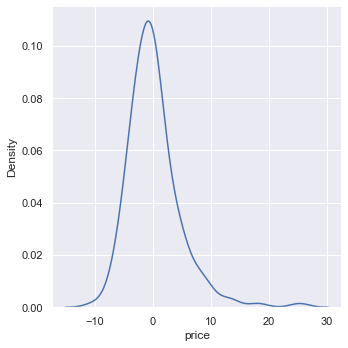

In [79]:
sns.displot(residuals,kind="kde")

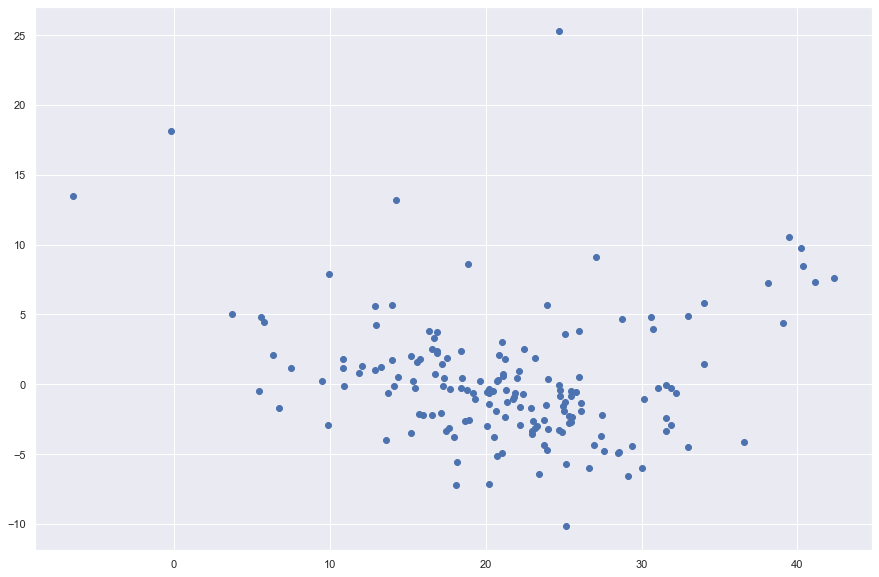

In [80]:
## Scatter plot with prediction s and residuals
#uniform distributionm: should not  have any shape like sine , parabola etc
plt.scatter(reg_pred,residuals)

In [81]:
## performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

20.7524163208003
3.146011462661694
4.5554820075158124


In [82]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.725781906024621


In [83]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7024823294123339

## Lasso Regression ( L1 Regularization)

In [84]:
from sklearn.linear_model import Lasso

In [85]:
regression = Lasso(alpha=1.0)

In [86]:
regression

Lasso()

In [87]:
regression = regression.fit(X_train,y_train)

In [89]:
regression.coef_

array([-0.        ,  0.        , -0.        ,  0.27140271, -0.        ,
        2.62932147, -0.        , -0.        , -0.        , -0.        ,
       -1.21106809,  0.29872625, -3.81788375])

In [90]:
regression.intercept_

22.970796460176988

In [91]:
reg_pred=regression.predict(X_test)

In [92]:
reg_pred

array([26.08015466, 30.7480057 , 17.78164882, 25.25224684, 19.28387274,
       22.81161765, 18.31125182, 14.6359243 , 21.41277818, 20.44276659,
       20.7857368 , 21.00978479,  1.29101416, 22.48591111, 20.4207989 ,
       24.73115299, 18.16643043,  6.95747132, 35.82658816, 18.45664358,
       25.66618031, 26.77096265, 13.79601995, 24.00317031, 18.83677575,
       15.53225538, 22.93567982, 18.81410882, 19.96419904, 19.71394554,
       19.9929271 , 25.48086778, 25.07506471, 19.62299031, 15.87164442,
       20.47826644, 30.90020658, 21.73740698, 21.69357896, 24.78795141,
       14.48946282, 27.49872616, 36.28097645, 19.68302782, 25.54695918,
       17.26691093, 16.01035524, 25.87512519, 19.3705841 , 29.52965183,
       23.10173719, 31.37342903, 17.55332715, 25.82107048, 34.98857199,
       22.91267519, 19.3967501 , 29.34678421, 24.65125376, 16.72971658,
       25.42537393, 30.6751849 , 28.90511192, 18.42571639, 27.56426639,
       14.62706882, 20.02272756, 25.60745002, 28.32959623, 15.91

Text(0, 0.5, 'Test Predicted data')

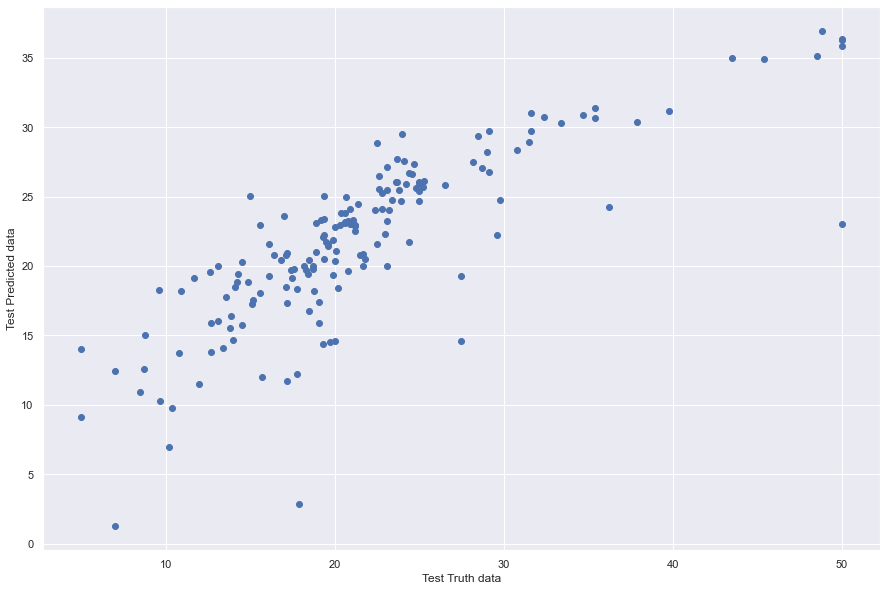

In [95]:
### Assumptions of linear regression
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth data")
plt.ylabel("Test Predicted data")

In [96]:
# residuals
residuals=y_test-reg_pred
residuals

173    -2.480155
274     1.651994
491    -4.181649
72     -2.452247
452    -3.183873
         ...    
110     0.864934
321    -2.373897
265    -1.335776
29     -2.029446
262    11.896754
Name: price, Length: 167, dtype: float64

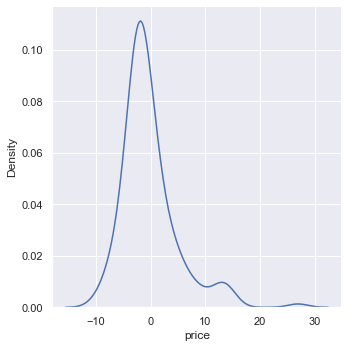

In [97]:
sns.displot(residuals,kind="kde")

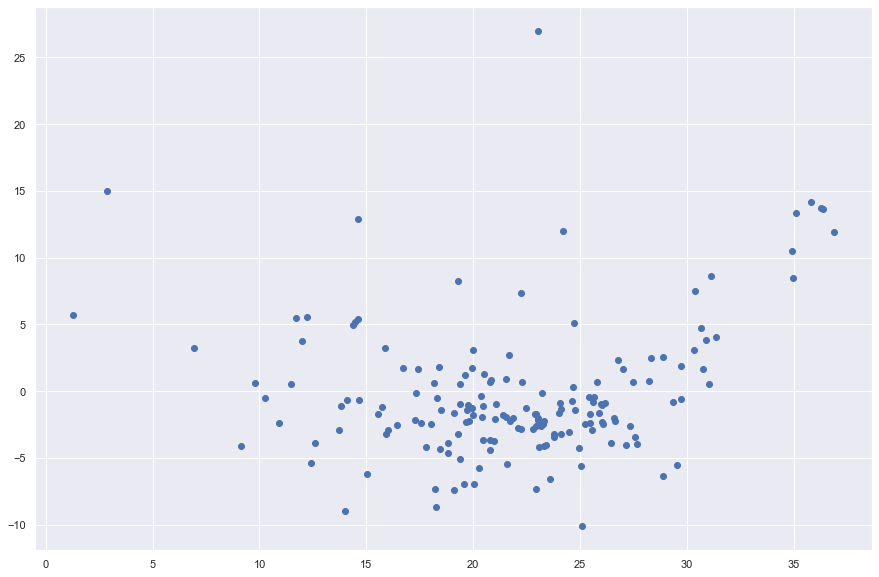

In [98]:
## Scatter plot with prediction s and residuals
#uniform distributionm: should not  have any shape like sine , parabola etc
plt.scatter(reg_pred,residuals)

In [99]:
## performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

26.16637721498099
3.6464026430077423
5.11530812512609


In [100]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.6542429577734992


In [101]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6248649084339926

## ElasticNet Regression

In [102]:
from sklearn.linear_model import ElasticNet

In [105]:
regression = ElasticNet(alpha=1.0)

In [106]:
regression

ElasticNet()

In [107]:
regression= regression.fit(X_train,y_train)

In [108]:
regression.coef_

array([-0.36520114,  0.        , -0.14336748,  0.63145824, -0.25193148,
        2.34999448, -0.        , -0.        , -0.        , -0.25649969,
       -1.23951556,  0.56384945, -2.56053213])

In [109]:
regression.intercept_

22.970796460176988

In [110]:
reg_pred=regression.predict(X_test)

In [111]:
reg_pred

array([26.04802695, 31.11448131, 18.09845158, 24.74715491, 19.13029713,
       23.07195028, 19.8492127 , 16.42921582, 20.98280883, 21.03040905,
       23.59247585, 22.4067143 ,  2.50342106, 22.86968897, 21.05836477,
       23.53088819, 19.32942155,  9.24659633, 34.51755093, 18.33111982,
       25.39963891, 26.53220506, 16.04212388, 23.68595117, 18.22309609,
       15.9070075 , 22.91791506, 17.40135861, 22.80881602, 20.34960072,
       21.28107265, 25.0664737 , 23.29041734, 18.52289666, 16.68946719,
       20.17099878, 29.78000437, 22.08911412, 24.00624402, 24.52109601,
       16.51539744, 27.25142517, 34.8940966 , 20.75229792, 25.54944362,
       17.27877681, 17.51067948, 25.422475  , 19.45141801, 28.72445431,
       23.85816391, 30.64335445, 19.05778782, 25.10137208, 33.43673587,
       21.9368327 , 19.10068361, 28.38705767, 24.91075492, 18.68821158,
       25.41735754, 29.96236233, 27.77368373, 18.66077461, 26.83456776,
       18.72984267, 19.66634919, 25.37569386, 27.64862833, 15.09

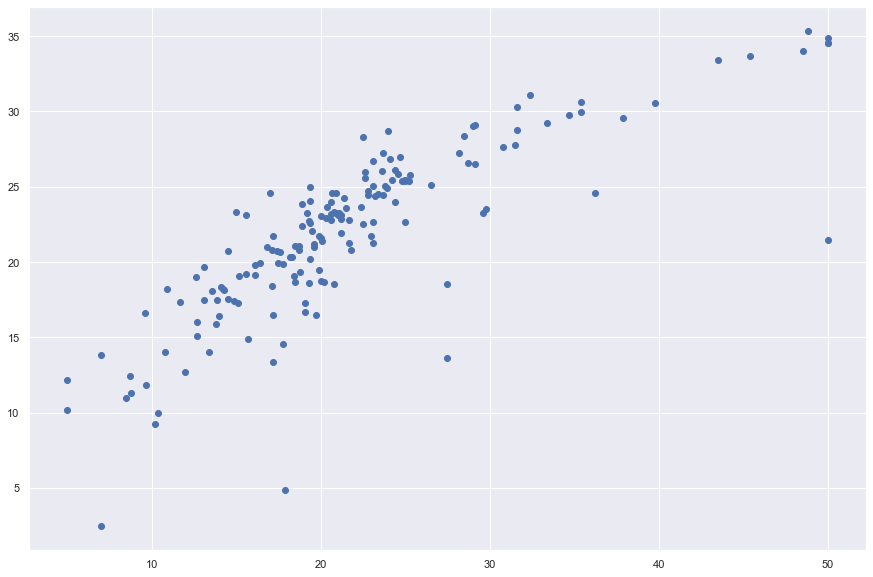

In [112]:
plt.scatter(y_test,reg_pred)

In [113]:
residuals=y_test-reg_pred
residuals

173    -2.448027
274     1.285519
491    -4.498452
72     -1.947155
452    -3.030297
         ...    
110     0.428514
321    -1.920378
265    -1.645018
29     -2.106526
262    13.490268
Name: price, Length: 167, dtype: float64

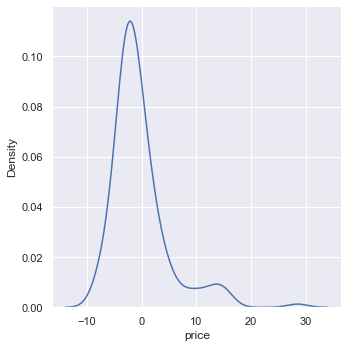

In [116]:
sns.displot(residuals,kind="kde")

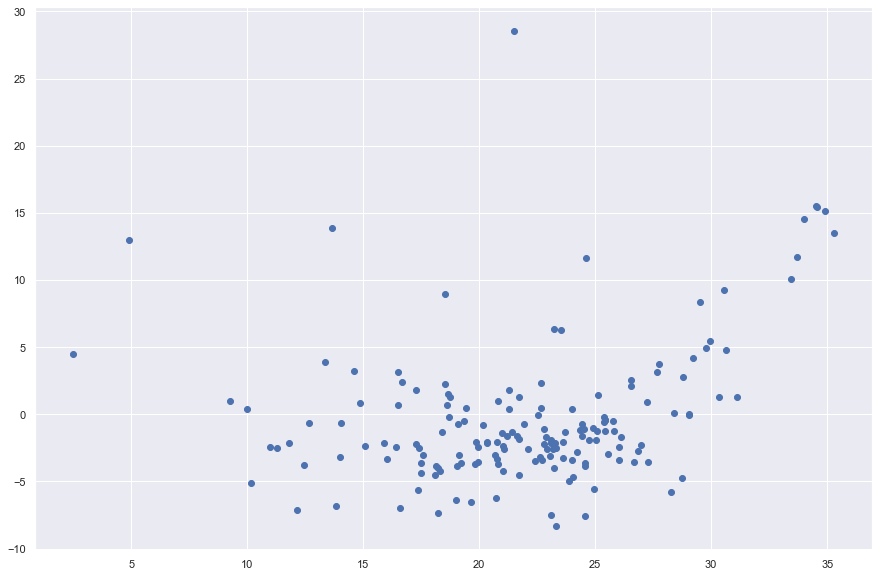

In [117]:
plt.scatter(reg_pred,residuals)

In [118]:
## performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

27.140175406489988
3.627745135070299
5.209623345932985


In [119]:
# R square and adjusted R square
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.641375391902405


In [120]:
## adjsuted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.610904019972544